In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/data/pamip_k_efp_winters.csv')

# Import jet shift data (Screen 2022)
jet_responses = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/daily_efp/data/jet_responses_screen2022.csv')

# merge datasets
df2 = pd.merge(jet_responses, df, on='model', how='outer')

# Drop models which don't have efp data
df2 = df2.dropna(subset=['efp_nh']).reset_index(drop=True)
df2

,model,efp_nh,efp_nh_gt3,efp_nh_123,efp_sh,efp_sh_gt3,efp_sh_123
0,AWI-CM-1-1-MR,0.2592,0.1931,0.0607,0.2557,0.2325,0.0223
1,CNRM-CM6-1,0.2244,0.1286,0.0827,0.1944,0.1805,0.0132
2,CanESM5,0.3133,0.1771,0.1232,0.3271,0.2758,0.0195
3,FGOALS-f3-L,0.2353,0.1231,0.0731,0.1273,0.1061,0.0114
4,HadGEM3-GC31-LL,0.1735,0.1072,0.0529,0.1729,0.1528,0.0160
5,HadGEM3-GC31-MM,0.2525,0.1087,0.1022,0.1874,0.1544,0.0140
6,IPSL-CM6A-LR,0.2623,0.1947,0.0654,0.2015,0.1938,0.0179
7,MIROC6,0.1592,0.1045,0.0425,0.2058,0.1458,0.0273


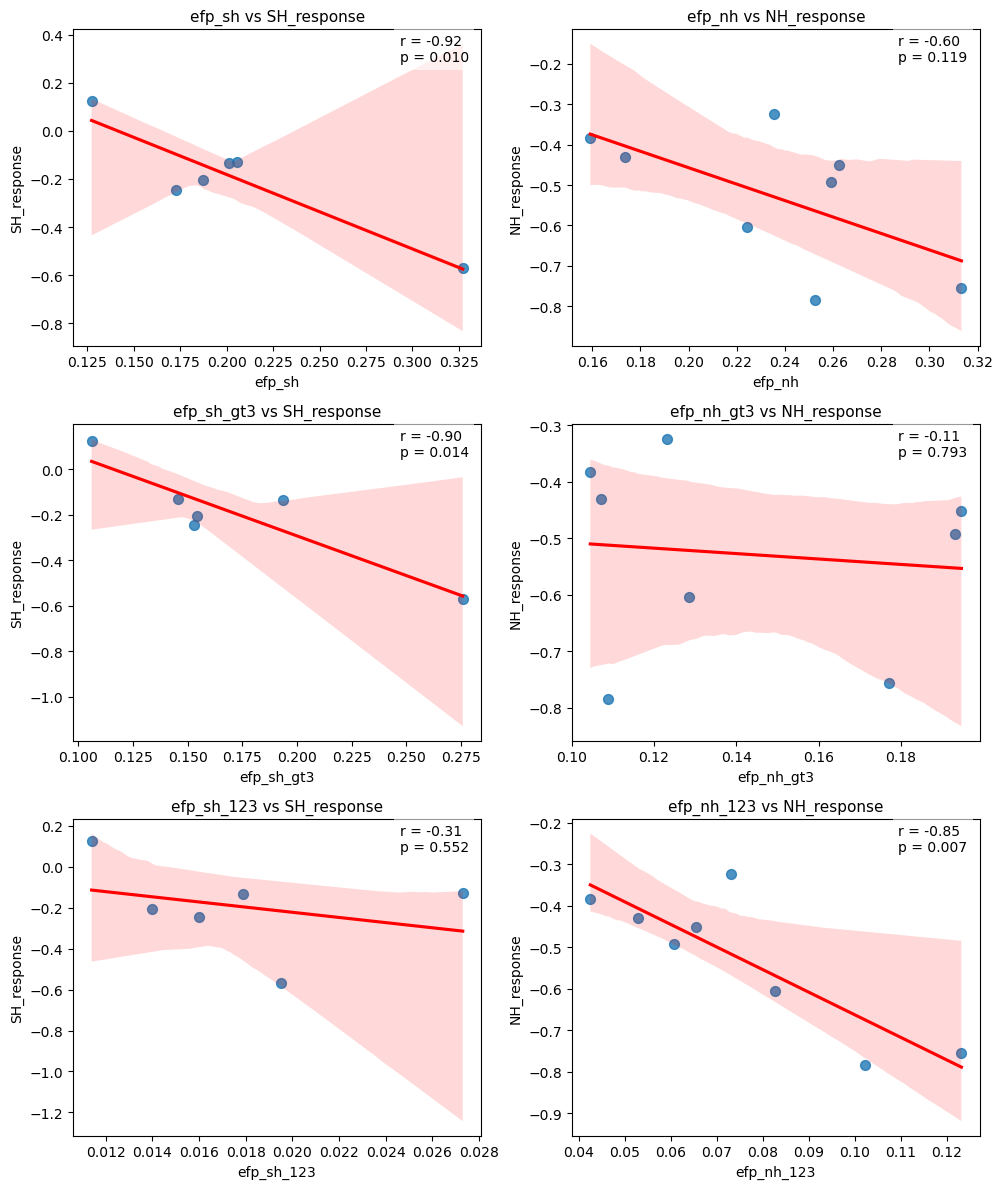

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Assuming your DataFrame is called df
# e.g. df = pd.read_csv("your_file.csv")

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

plot_pairs = [
    ('efp_sh', 'SH_response'),
    ('efp_nh', 'NH_response'),
    ('efp_sh_gt3', 'SH_response'),
    ('efp_nh_gt3', 'NH_response'),
    ('efp_sh_123', 'SH_response'),
    ('efp_nh_123', 'NH_response')
]

for ax, (x, y) in zip(axes.flat, plot_pairs):
    # Mask to drop NaNs for correlation
    mask = df2[[x,y]].dropna()
    r, p = pearsonr(mask[x], mask[y])
    
    # Regression plot
    sns.regplot(data=df2, x=x, y=y, ax=ax, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    
    # Title and labels
    ax.set_title(f"{x} vs {y}", fontsize=11)
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel(y, fontsize=10)
    
    # Annotate r and p values on the plot
    ax.text(0.8, 0.90, f"r = {r:.2f}\np = {p:.3f}",
            transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.tight_layout()
plt.show()
